**Assignment for May 13th**<br>
**Antoine Valero, Kunwoo Lee, Naoaki Motobayashi**

## Table of Contents
- **Loading Python Packages and the Data**
- **Data Preparation**
- **Applying PCA (& Factor Analysis) to All Survey Answers**
 - Step 1. Data Visualization
 - Step 2. Data Transformation
 - Step 3. Analysis and Results
 - Step 4. 3D Graph
 - Step 5. Intuition
 - <span style="color:blue">**Conclusion:<br>
   This section summarizes the conclusions of the analysis from Steps 1 through 4.**</span>

## Loading Python Packages and the Data

In [1]:
#pip install xlrd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

# We will use more packages in the subsequent code.

In [2]:
#!pip install openpyxl
xlsx = pd.ExcelFile("Dataset_Appended.xlsx")
df = pd.read_excel(xlsx, 1, header=[0, 1])
pd.set_option('display.max_columns', None)
df.head()

Discriminative Variables  \
  Do you agree to partake in this survey   
0                                    Yes   
1                                    Yes   
2                                    Yes   
3                                    Yes   
4                                    Yes   

                                                                     \
  How old are you in years? Put in years only Nationality (Country)   
0                                          20                France   
1                                          20                France   
2                                          22                 China   
3                                          24           South Korea   
4                                          21                 Japan   

                                                                 \
  Where you in japan for the length of studies during Covid-19?   
0                                                 No              
1                                                 No              
2                                                 No              
3                                                 No              
4                                                Yes              

                                                                           \
  What Keio Economics student type are you? (A/B Student or PEARL Student   
0                                      Pearl Student                        
1                                      Pearl Student                        
2                                      Pearl Student                        
3                                      Pearl Student                        
4                                      Pearl Student                        

                                                     \
  Year Level What is your estimated GPA? In numbers   
0          3                                    3.6   
1          3                                    3.5   
2          4                                    3.6   
3          3                                    3.4   
4          3                                    3.2   

                                                          Survey Question  \
  How significantly has covid impacted your life, lifestyle and education   
0                                                  2                        
1                                                  2                        
2                                                  2                        
3                                                  1                        
4                                                  1                        

                                                                    \
  How significantly has my lifestyle been disrupted since Covid-19   
0                                                  2                 
1                                                  1                 
2                                                  2                 
3                                                  1                 
4                                                  1                 

                                                     \
  How has your sleep schedule change since covid-19   
0                                                 2   
1                                                -2   
2                                                -1   
3                                                 1   
4                                                 2   

                                                        \
  How has your exercise schedule change since covid-19   
0                                                  1     
1                                                  2     
2                                                  0     
3                                                  1     
4                                               

In [3]:
print(df.shape)

(132, 28)


In [4]:
#df.info()

## Data Preparation

In [5]:
df = pd.read_excel(xlsx, 1, header=[1])
df.rename(columns = {'Do you agree to partake in this survey':'Partake',
                     'How old are you in years? Put in years only':'Age',
                     'Nationality (Country)':'Nationality',
                     'Where you in japan for the length of studies during Covid-19?':'InJapan',
                     'What Keio Economics student type are you? (A/B Student or PEARL Student':'PEARL_A_B',
                     'Year Level':'Year',
                     'What is your estimated GPA? In numbers':'GPA',
                     'How significantly has covid impacted your life, lifestyle and education':'SQ_LifeLifestyleEdu',
                     'How significantly has my lifestyle been disrupted since Covid-19':'SQ_Lifestyle',
                     'How has your sleep schedule change since covid-19':'SQ_Sleep',
                     'How has your exercise schedule change since covid-19':'SQ_Exercise',
                     'How has your communication with your peers, friends and classmates changed since covid-19':'SQ_CommFriends',
                     'How has your communication with your teachers, professors and teach assistant changed since covid-19':'SQ_CommProfs',
                     'How significantly has my class attendance changed since covid-19?':'SQ_ClassAttend',
                     'How significantly has my class assiduity changed since covid-19?':'SQ_ClassAssiduity',
                     'How significantly has my class participation changed since covid-19?':'SQ_ClassPartChg',
                     'How significant have you gained from class participation since covid-19?':'SQ_ClassPartGain',
                     'How significantly has my grades changed since covid-19?':'SQ_CovGradesChg',
                     'How significantly has online classes due to covid-19 impacted my class engagement?':'SQ_CovImpEng',
                     'How significantly have online classes due to covid-19 impacted my grades?':'SQ_CovImpGrades',
                     'How significantly have online classes due to covid-19 impacted my motivation to study?':'SQ_CovImpMotiv',
                     'How significantly have online classes due to covid-10 impacted my concentration?':'SQ_CovImpConcen',
                     'Do you feel grades you have received during online classes are fair?':'SQ_OnlineFair',
                     'Do you feel the online lectures were on par with the lectures dispensed?':'SQ_OnlinePar',
                     'How significantly has online curriculum offering impacted your academic interests':'SQ_OnlineImpAcaInterests',
                     'How significantly has online curriculum impacted your academic grades':'SQ_OnlineImpAcaGrades',
                     'How significantly has learning through Covid-19 impact your academic future?':'SQ_ImpAcaFuture',
                     'How significantly has learning through Covid-19 imapct you professional future?':'SQ_ImpProfFuture',
                     },
                     inplace = True)
df.head()

,Partake,Age,Nationality,InJapan,PEARL_A_B,Year,GPA,SQ_LifeLifestyleEdu,SQ_Lifestyle,SQ_Sleep,SQ_Exercise,SQ_CommFriends,SQ_CommProfs,SQ_ClassAttend,SQ_ClassAssiduity,SQ_ClassPartChg,SQ_ClassPartGain,SQ_CovGradesChg,SQ_CovImpEng,SQ_CovImpGrades,SQ_CovImpMotiv,SQ_CovImpConcen,SQ_OnlineFair,SQ_OnlinePar,SQ_OnlineImpAcaInterests,SQ_OnlineImpAcaGrades,SQ_ImpAcaFuture,SQ_ImpProfFuture
0,Yes,20,France,No,Pearl Student,3,3.6,2,2,2,1,-1,0,0,0,-1,-2,-1,-2,-1,-1,-2,-1,0,-1,0,2,2
1,Yes,20,France,No,Pearl Student,3,3.5,2,1,-2,2,-1,-1,0,0,0,1,0,-2,0,-2,-2,-1,-1,-2,0,2,2
2,Yes,22,China,No,Pearl Student,4,3.6,2,2,-1,0,-2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-2,0,-1,-1,-1,1,2
3,Yes,24,South Korea,No,Pearl Student,3,3.4,1,1,1,1,2,0,1,-2,-1,-1,0,-1,0,-1,-2,-1,-1,-1,0,-1,0
4,Yes,21,Japan,Yes,Pearl Student,3,3.2,1,1,2,-1,0,0,0,2,2,2,2,2,2,1,1,2,1,2,2,-1,-1


In the following, **"InJapan"** and **"PEARL_A_B"** are converted to dummy variables.
- InJapan: Yes, Both, No<br>
Yes: 1, Both & No: 0 (The column name is **"InJapanYes"**.)
- PEARL_A_B: PEARL Student, A/B<br>
PEARL Student: 1, A/B: 0 (The column name is **"PEARL"**.)

In [6]:
df["InJapan"].value_counts()

Yes     108
No       22
Both      2
Name: InJapan, dtype: int64

In [7]:
df["PEARL_A_B"].value_counts()

Pearl Student    72
A/B              60
Name: PEARL_A_B, dtype: int64

In [8]:
InJapanDum = pd.get_dummies(df.InJapan)
InJapanDum = InJapanDum.drop("No", axis=1)
InJapanDum = InJapanDum.drop("Both", axis=1)
df = df.join(InJapanDum)
df.rename(columns = {'Yes':'InJapanYes'}, inplace = True)

PEARL_A_BDum = pd.get_dummies(df.PEARL_A_B)
PEARL_A_BDum = PEARL_A_BDum.drop("A/B", axis=1)
df = df.join(PEARL_A_BDum)
df.rename(columns = {'Pearl Student':'PEARL'}, inplace = True)

df.head()

,Partake,Age,Nationality,InJapan,PEARL_A_B,Year,GPA,SQ_LifeLifestyleEdu,SQ_Lifestyle,SQ_Sleep,SQ_Exercise,SQ_CommFriends,SQ_CommProfs,SQ_ClassAttend,SQ_ClassAssiduity,SQ_ClassPartChg,SQ_ClassPartGain,SQ_CovGradesChg,SQ_CovImpEng,SQ_CovImpGrades,SQ_CovImpMotiv,SQ_CovImpConcen,SQ_OnlineFair,SQ_OnlinePar,SQ_OnlineImpAcaInterests,SQ_OnlineImpAcaGrades,SQ_ImpAcaFuture,SQ_ImpProfFuture,InJapanYes,PEARL
0,Yes,20,France,No,Pearl Student,3,3.6,2,2,2,1,-1,0,0,0,-1,-2,-1,-2,-1,-1,-2,-1,0,-1,0,2,2,0,1
1,Yes,20,France,No,Pearl Student,3,3.5,2,1,-2,2,-1,-1,0,0,0,1,0,-2,0,-2,-2,-1,-1,-2,0,2,2,0,1
2,Yes,22,China,No,Pearl Student,4,3.6,2,2,-1,0,-2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-2,0,-1,-1,-1,1,2,0,1
3,Yes,24,South Korea,No,Pearl Student,3,3.4,1,1,1,1,2,0,1,-2,-1,-1,0,-1,0,-1,-2,-1,-1,-1,0,-1,0,0,1
4,Yes,21,Japan,Yes,Pearl Student,3,3.2,1,1,2,-1,0,0,0,2,2,2,2,2,2,1,1,2,1,2,2,-1,-1,1,1


In [9]:
df["InJapanYes"].value_counts()

1    108
0     24
Name: InJapanYes, dtype: int64

In [10]:
df["PEARL"].value_counts()

1    72
0    60
Name: PEARL, dtype: int64

## Applying PCA (& Factor Analysis) to All Survey Answers
- **Impact of COVID-19 on Your Overall Life**<br>
"SQ_LifeLifestyleEdu", "SQ_Lifestyle", "SQ_Sleep", "SQ_Exercise", "SQ_CommFriends", "SQ_CommProfs"
- **Impact of COVID-19 on Your Academic Attendance/Participation**<br>
"SQ_ClassAttend", "SQ_ClassAssiduity", "SQ_ClassPartChg", "SQ_ClassPartGain"
- **Impact of COVID-19 on Your Academic Engagement and Grades**<br>
"SQ_CovGradesChg", "SQ_CovImpEng", "SQ_CovImpGrades", "SQ_CovImpMotiv", "SQ_CovImpConcen"
- **Impact of COVID-19 on My Perception of Academic Quality**<br>
"SQ_OnlineFair", "SQ_OnlinePar", "SQ_OnlineImpAcaInterests", "SQ_OnlineImpAcaGrades"
- **Impact of COVID-19 on My Future Plans (not directional data)** <br>
"SQ_ImpAcaFuture", "SQ_ImpProfFuture"

### Step 1. Data Visualization

<AxesSubplot:title={'center':'Correlation Matrix'}>

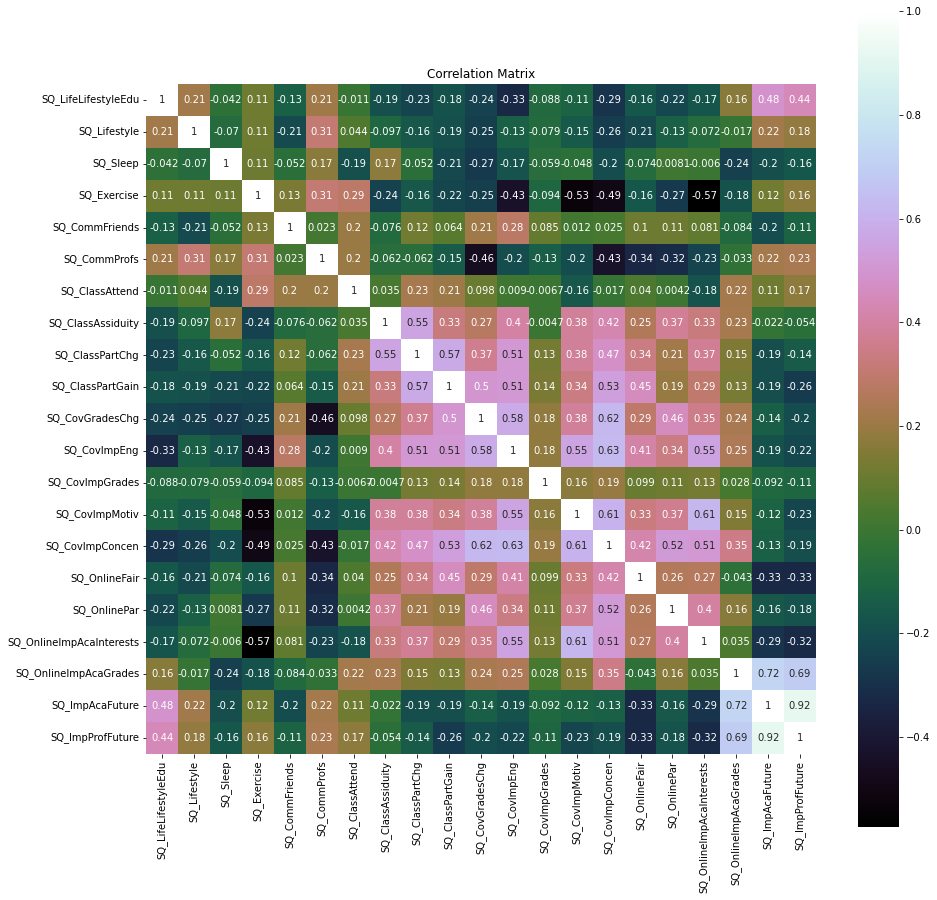

In [11]:
df_SQ = df[["SQ_LifeLifestyleEdu", "SQ_Lifestyle", "SQ_Sleep", "SQ_Exercise", "SQ_CommFriends", "SQ_CommProfs",
            "SQ_ClassAttend", "SQ_ClassAssiduity", "SQ_ClassPartChg", "SQ_ClassPartGain",
            "SQ_CovGradesChg", "SQ_CovImpEng", "SQ_CovImpGrades", "SQ_CovImpMotiv", "SQ_CovImpConcen",
            "SQ_OnlineFair", "SQ_OnlinePar", "SQ_OnlineImpAcaInterests", "SQ_OnlineImpAcaGrades",
            "SQ_ImpAcaFuture", "SQ_ImpProfFuture"]]
#df_SQ = df.iloc[:,-23:-2] # The right one can also be used.
# Correlation
correlation = df_SQ.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

### Step 2. Data Transformation
Before applying PCA, all the variables should be on the same scale; otherwise, a feature with large values will dominate the result. Below we use StandardScaler in sklearn to standardize the dataset’s features onto a unit scale (mean = 0 and variance = 1). Standardization is a useful technique to transform attributes to a standard normal distribution with a mean of 0 and a standard deviation of 1 (c.f. Machine Learning & Data Science Blueprints for Finance).

In [12]:
scaler = StandardScaler().fit(df_SQ)
rescaled_df = pd.DataFrame(scaler.fit_transform(df_SQ),
                           columns = df_SQ.columns, index = df_SQ.index)
# Summarize transformed data
df_SQ.dropna(how='any', inplace=True)
rescaled_df.dropna(how='any', inplace=True)
rescaled_df.head()

C:\Users\jazzn\AppData\Local\Temp\ipykernel_7500\1411096637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SQ.dropna(how='any', inplace=True)


,SQ_LifeLifestyleEdu,SQ_Lifestyle,SQ_Sleep,SQ_Exercise,SQ_CommFriends,SQ_CommProfs,SQ_ClassAttend,SQ_ClassAssiduity,SQ_ClassPartChg,SQ_ClassPartGain,SQ_CovGradesChg,SQ_CovImpEng,SQ_CovImpGrades,SQ_CovImpMotiv,SQ_CovImpConcen,SQ_OnlineFair,SQ_OnlinePar,SQ_OnlineImpAcaInterests,SQ_OnlineImpAcaGrades,SQ_ImpAcaFuture,SQ_ImpProfFuture
0,1.257079,1.079894,3.134467,1.376080,-1.430170,1.111990,-0.091120,0.386598,-1.373089,-2.717271,-2.304664,-2.976240,-0.680285,-1.408957,-1.895307,-1.222182,0.388465,-1.288222,-0.911894,0.692438,0.657308
1,1.257079,-0.420590,-2.972539,2.840939,-1.430170,-0.614865,-0.091120,0.386598,0.386598,1.940908,-0.896258,-2.976240,-0.301392,-3.163507,-1.895307,-1.222182,-1.320783,-2.877430,-0.911894,0.692438,0.657308
2,1.257079,1.079894,-1.445787,-0.088779,-3.245385,-0.614865,-2.496693,-1.373089,-1.373089,-1.164545,-2.304664,-1.268137,-0.680285,-1.408957,-1.895307,0.440994,-1.320783,-1.288222,-1.532358,-0.016103,0.657308
3,-0.471405,-0.420590,1.607716,1.376080,4.015477,1.111990,2.314453,-3.132776,-1.373089,-1.164545,-0.896258,-1.268137,-0.301392,-1.408957,-1.895307,-1.222182,-1.320783,-1.288222,-0.911894,-1.433187,-0.709065
4,-0.471405,-0.420590,3.134467,-1.553639,0.385046,1.111990,-0.091120,3.905972,3.905972,3.493634,1.920553,3.856172,0.456394,2.100143,1.765871,3.767345,2.097714,3.479403,0.329034,-1.433187,-1.392251


### Step 3. Analysis and Results

In [13]:
X = rescaled_df
pca = PCA()
PrincipalComponent = pca.fit(X)

In [14]:
print("eigenvalues")
print(pca.explained_variance_)

eigenvalues
[5.9169776  2.92857924 1.83173723 1.48967638 1.15754872 1.06493979
 0.93518573 0.90074444 0.81653576 0.6128247  0.58077788 0.49687004
 0.46515716 0.40998213 0.35698058 0.30742743 0.2646328  0.24214379
 0.20341812 0.12248749 0.05567833]


In [15]:
print("contribution ratio")
print(pca.explained_variance_ratio_)

contribution ratio
[0.27962629 0.13839967 0.08656478 0.07039957 0.05470378 0.05032724
 0.04419529 0.04256765 0.03858809 0.02896105 0.02744657 0.02348123
 0.02198254 0.01937506 0.01687029 0.0145285  0.0125061  0.0114433
 0.00961319 0.00578855 0.00263126]


In [16]:
print("cumulative contribution ratio")
print(np.cumsum(pca.explained_variance_ratio_))

cumulative contribution ratio
[0.27962629 0.41802595 0.50459074 0.57499031 0.62969409 0.68002133
 0.72421661 0.76678426 0.80537235 0.8343334  0.86177998 0.88526121
 0.90724375 0.9266188  0.9434891  0.95801759 0.97052369 0.98196699
 0.99158019 0.99736874 1.        ]


,Cumulative Explained Variance
0,27.96%
1,41.80%
2,50.46%
3,57.50%
4,62.97%
5,68.00%
6,72.42%
7,76.68%
8,80.54%
9,83.43%


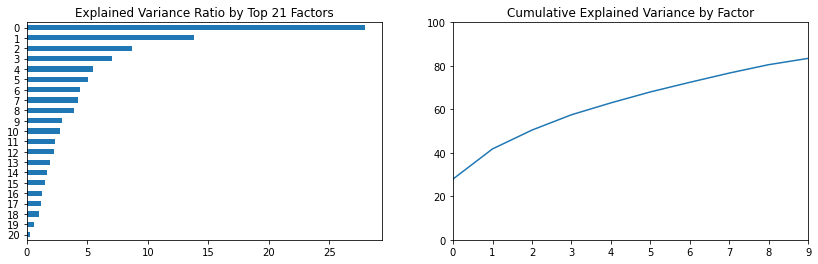

In [17]:
NumEigenvalues=21
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 21 Factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by Factor');
# Cumulative explained variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Cumulative Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

#### n_factors=6 (Why we chose n_factors=6 is explained in conclusion.)

In [18]:
#pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=6, method='principal', rotation="varimax")
fa.fit(X)
print("Rotated component matrix")
print(fa.loadings_.round(3))

Rotated component matrix
[[-0.233  0.419 -0.061 -0.154 -0.342 -0.183]
 [-0.068  0.104  0.056 -0.149 -0.695 -0.135]
 [-0.178 -0.216 -0.039  0.808 -0.022 -0.084]
 [-0.015  0.005 -0.796  0.103 -0.128  0.142]
 [ 0.056 -0.111 -0.088  0.028  0.091  0.861]
 [ 0.031  0.131 -0.242  0.299 -0.759  0.15 ]
 [ 0.52   0.215 -0.455 -0.095 -0.104  0.304]
 [ 0.57   0.131  0.323  0.524  0.132 -0.146]
 [ 0.795 -0.041  0.218  0.158  0.017  0.092]
 [ 0.776 -0.123  0.186 -0.235  0.118 -0.01 ]
 [ 0.412  0.045  0.326 -0.238  0.51   0.272]
 [ 0.517 -0.025  0.579 -0.069  0.13   0.332]
 [-0.012 -0.057  0.235 -0.202  0.064  0.376]
 [ 0.279 -0.02   0.766  0.042  0.083  0.047]
 [ 0.478  0.072  0.58  -0.104  0.447  0.035]
 [ 0.51  -0.294  0.161 -0.157  0.302 -0.102]
 [ 0.176  0.05   0.408  0.214  0.467  0.183]
 [ 0.199 -0.168  0.797  0.066  0.016  0.136]
 [ 0.215  0.878  0.167 -0.052  0.16   0.022]
 [-0.123  0.929 -0.098 -0.068 -0.153 -0.115]
 [-0.13   0.911 -0.194 -0.014 -0.14  -0.043]]


C:\Users\jazzn\anaconda3\envs\zemi\lib\site-packages\sklearn\utils\extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


Rotated component matrix
[[-0.338  0.466]
 [-0.296  0.222]
 [-0.208 -0.334]
 [-0.571  0.008]
 [ 0.136 -0.174]
 [-0.444  0.189]
 [ 0.029  0.278]
 [ 0.562  0.099]
 [ 0.643  0.009]
 [ 0.66  -0.024]
 [ 0.729  0.026]
 [ 0.803 -0.008]
 [ 0.24  -0.065]
 [ 0.714 -0.021]
 [ 0.868  0.062]
 [ 0.536 -0.249]
 [ 0.579 -0.047]
 [ 0.669 -0.174]
 [ 0.316  0.857]
 [-0.212  0.93 ]
 [-0.267  0.899]]


C:\Users\jazzn\anaconda3\envs\zemi\lib\site-packages\sklearn\utils\extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


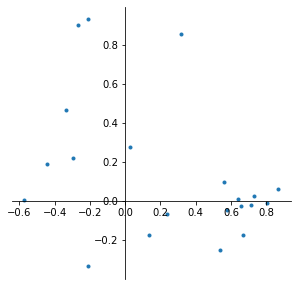

In [19]:
#pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, method='principal', rotation="varimax")
fa.fit(X)
print("Rotated component matrix")
print(fa.loadings_.round(3))

import numpy as np
import matplotlib.pyplot as plt

x = fa.loadings_.round(3)[:, 0]
y = fa.loadings_.round(3)[:, 1]

fig,ax = plt.subplots(figsize=(5,5),facecolor='white') # dpi = 100
plt.scatter(x,y,marker='.')

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.tick_params(direction='inout')

plt.show()

### Step 4. 3D Graph
(Here, we use up to the third component.)
#### n_factors=3

Rotated component matrix
[[-0.268  0.494 -0.222]
 [-0.246  0.245 -0.182]
 [-0.151 -0.305 -0.288]
 [-0.7   -0.017  0.393]
 [-0.008 -0.223  0.513]
 [-0.477  0.19   0.092]
 [-0.162  0.211  0.743]
 [ 0.553  0.077  0.123]
 [ 0.532 -0.048  0.489]
 [ 0.543 -0.083  0.507]
 [ 0.654 -0.022  0.371]
 [ 0.751 -0.051  0.295]
 [ 0.216 -0.079  0.109]
 [ 0.773 -0.023 -0.124]
 [ 0.859  0.031  0.158]
 [ 0.467 -0.286  0.28 ]
 [ 0.585 -0.062  0.047]
 [ 0.731 -0.172 -0.167]
 [ 0.325  0.841  0.148]
 [-0.159  0.944 -0.068]
 [-0.237  0.907  0.   ]]


C:\Users\jazzn\anaconda3\envs\zemi\lib\site-packages\sklearn\utils\extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


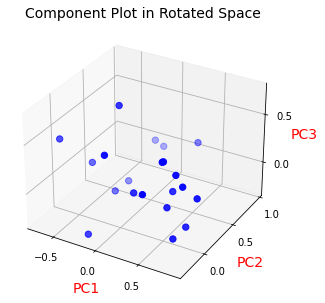

In [20]:
#pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=3, method='principal', rotation="varimax")
fa.fit(X)
print("Rotated component matrix")
print(fa.loadings_.round(3))

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Add figure
fig = plt.figure(figsize = (5, 5))

# Add 3DAxes
ax = fig.add_subplot(111, projection='3d')

# Set the title of Axes
ax.set_title("Component Plot in Rotated Space", size = 14)

# Set axis labels
ax.set_xlabel("PC1", size = 14, color = "r")
ax.set_ylabel("PC2", size = 14, color = "r")
ax.set_zlabel("PC3", size = 14, color = "r")

# Set axis scale
ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax.set_zticks([-1.0, -0.5, 0.0, 0.5, 1.0])

# Assign numerical values
x = fa.loadings_.round(3)[:, 0]
y = fa.loadings_.round(3)[:, 1]
z = fa.loadings_.round(3)[:, 2]

# Draw a curve
ax.scatter(x, y, z, s = 40, c = "blue")

plt.show()

### Step 5. Intuition

In [21]:
print("PCA components")
print(pca.components_)

PCA components
[[-1.77388578e-01 -1.38851262e-01 -5.44083724e-02 -2.30807910e-01
   7.03057888e-02 -1.95752964e-01 -1.29944796e-02  2.17845745e-01
   2.58308155e-01  2.68113947e-01  2.91554935e-01  3.24567006e-01
   1.02625918e-01  2.89480441e-01  3.44621486e-01  2.38015914e-01
   2.37571780e-01  2.84887801e-01  5.16437960e-02 -1.67740984e-01
  -1.87149709e-01]
 [ 2.24473581e-01  9.01107997e-02 -2.17727299e-01 -6.71207799e-02
  -8.22869931e-02  5.27434597e-02  1.62690242e-01  1.27128316e-01
   8.60452423e-02  6.91531533e-02  1.06342445e-01  9.61386198e-02
  -6.76294162e-03  7.76733625e-02  1.44440318e-01 -7.52385578e-02
   4.59323166e-02 -1.54316491e-02  5.30612734e-01  5.06441053e-01
   4.81329597e-01]
 [ 1.37710936e-01  9.71024640e-02  1.55805619e-01 -4.18519260e-01
  -3.81285552e-01 -1.46842180e-01 -5.47424604e-01  2.59219132e-02
  -2.47073083e-01 -2.59606905e-01 -1.37069777e-01 -6.60332899e-02
  -4.03492302e-02  2.38565191e-01  5.77720009e-02 -1.26466757e-01
   7.74140113e-02  2.51

In [22]:
def PCWeights():
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

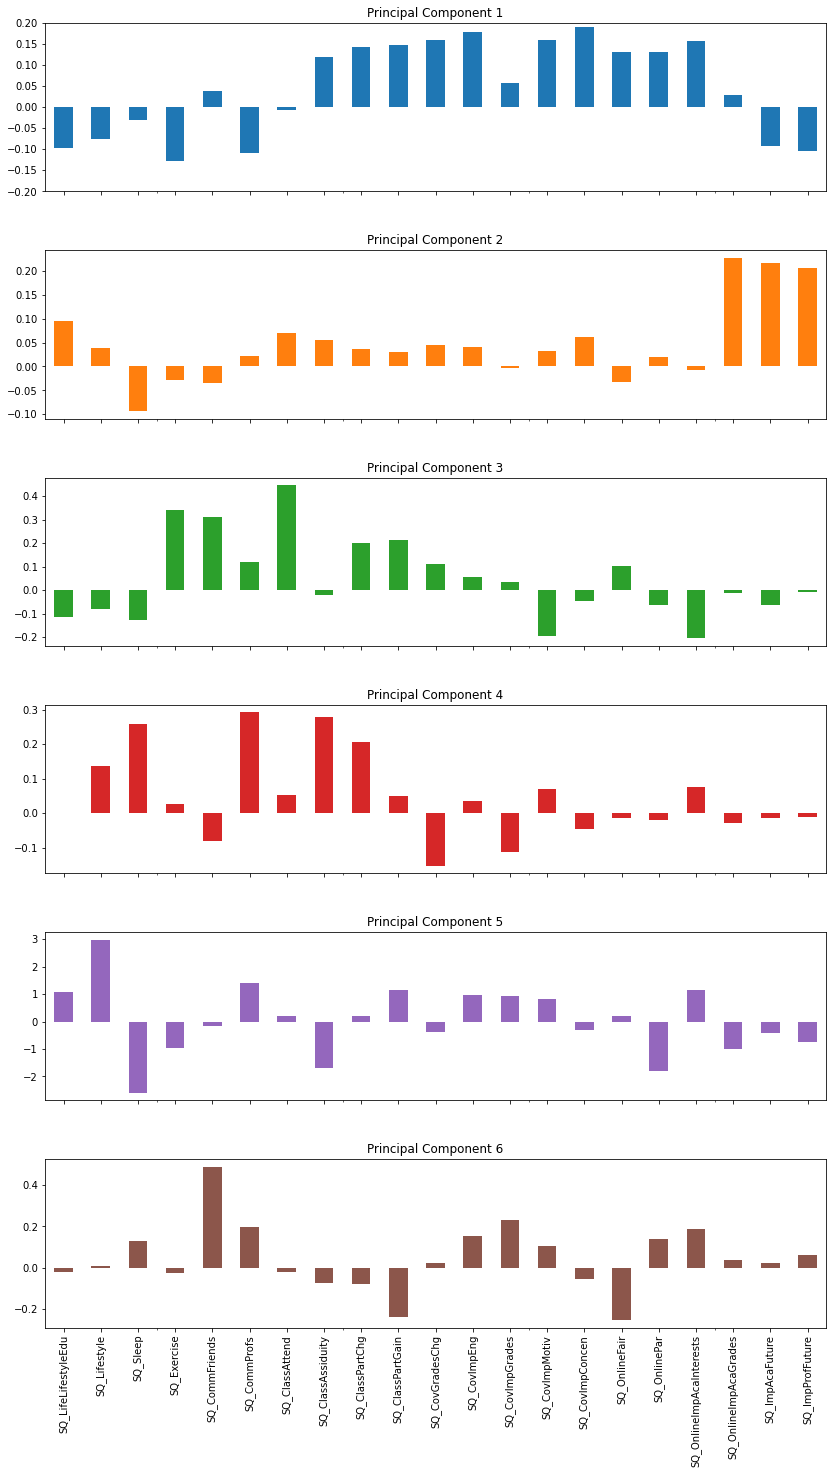

In [23]:
weights = PCWeights()
NumComponents=6

topPortfolios = pd.DataFrame(weights[:NumComponents], columns=X.columns)
topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents+1)]

axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,24))
plt.subplots_adjust(hspace=0.35)
axes[0].set_ylim(-0.2, .2);

### Conclusion
https://docs.google.com/document/d/12bhWL-NfzC0ahWN_jpJXsHkKirXZtZx3VN2Vr85_YNc/edit?usp=sharing

## Using the independent samples t-test to determine differences in overall life changes

In [24]:
df.head()

,Partake,Age,Nationality,InJapan,PEARL_A_B,Year,GPA,SQ_LifeLifestyleEdu,SQ_Lifestyle,SQ_Sleep,SQ_Exercise,SQ_CommFriends,SQ_CommProfs,SQ_ClassAttend,SQ_ClassAssiduity,SQ_ClassPartChg,SQ_ClassPartGain,SQ_CovGradesChg,SQ_CovImpEng,SQ_CovImpGrades,SQ_CovImpMotiv,SQ_CovImpConcen,SQ_OnlineFair,SQ_OnlinePar,SQ_OnlineImpAcaInterests,SQ_OnlineImpAcaGrades,SQ_ImpAcaFuture,SQ_ImpProfFuture,InJapanYes,PEARL
0,Yes,20,France,No,Pearl Student,3,3.6,2,2,2,1,-1,0,0,0,-1,-2,-1,-2,-1,-1,-2,-1,0,-1,0,2,2,0,1
1,Yes,20,France,No,Pearl Student,3,3.5,2,1,-2,2,-1,-1,0,0,0,1,0,-2,0,-2,-2,-1,-1,-2,0,2,2,0,1
2,Yes,22,China,No,Pearl Student,4,3.6,2,2,-1,0,-2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-2,0,-1,-1,-1,1,2,0,1
3,Yes,24,South Korea,No,Pearl Student,3,3.4,1,1,1,1,2,0,1,-2,-1,-1,0,-1,0,-1,-2,-1,-1,-1,0,-1,0,0,1
4,Yes,21,Japan,Yes,Pearl Student,3,3.2,1,1,2,-1,0,0,0,2,2,2,2,2,2,1,1,2,1,2,2,-1,-1,1,1


In [25]:
#df[""] = (df[""]+df[""]+df[""]+df[""])/4

In [26]:
# in progress